# Scatter matrix

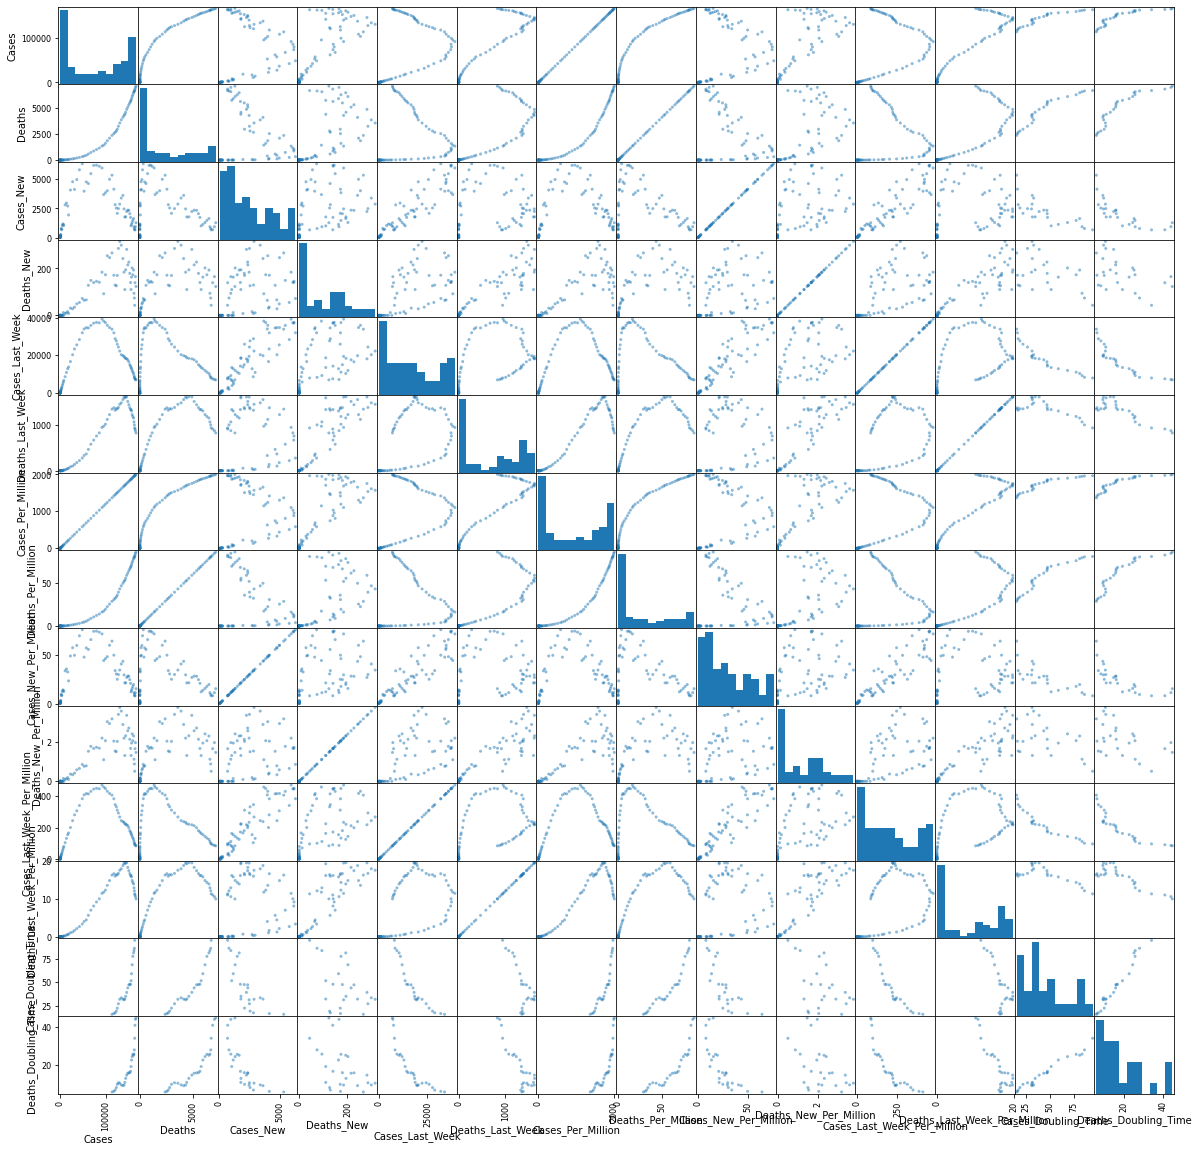

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scrape import entorb

area = 'DE-total'
de = entorb.to_dataframe(area)
ax = pd.plotting.scatter_matrix(de, figsize=(20,20))

# R²

In [2]:
corr = de.corr()**2
corr.style.background_gradient(cmap='Blues')

,Cases,Deaths,Cases_New,Deaths_New,Cases_Last_Week,Deaths_Last_Week,Cases_Per_Million,Deaths_Per_Million,Cases_New_Per_Million,Deaths_New_Per_Million,Cases_Last_Week_Per_Million,Deaths_Last_Week_Per_Million,Cases_Doubling_Time,Deaths_Doubling_Time
Cases,1.000000,0.881174,0.027066,0.645375,0.135092,0.865435,1.000000,0.881175,0.027066,0.645343,0.135092,0.865439,0.833595,0.727408
Deaths,0.881174,1.000000,0.016609,0.395084,0.001554,0.632976,0.881174,1.000000,0.016608,0.395052,0.001554,0.632983,0.883131,0.786854
Cases_New,0.027066,0.016609,1.000000,0.173051,0.831252,0.057819,0.027066,0.016608,1.000000,0.173027,0.831252,0.057818,0.587483,0.567753
Deaths_New,0.645375,0.395084,0.173051,1.000000,0.331537,0.800486,0.645375,0.395086,0.173053,1.000000,0.331537,0.800482,0.223984,0.216604
Cases_Last_Week,0.135092,0.001554,0.831252,0.331537,1.000000,0.222720,0.135092,0.001554,0.831255,0.331532,1.000000,0.222715,0.848554,0.754381
Deaths_Last_Week,0.865435,0.632976,0.057819,0.800486,0.222720,1.000000,0.865435,0.632977,0.057820,0.800479,0.222720,1.000000,0.549006,0.753126
Cases_Per_Million,1.000000,0.881174,0.027066,0.645375,0.135092,0.865435,1.000000,0.881175,0.027066,0.645343,0.135092,0.865439,0.833595,0.727408
Deaths_Per_Million,0.881175,1.000000,0.016608,0.395086,0.001554,0.632977,0.881175,1.000000,0.016608,0.395054,0.001554,0.632985,0.883133,0.786853
Cases_New_Per_Million,0.027066,0.016608,1.000000,0.173053,0.831255,0.057820,0.027066,0.016608,1.000000,0.173029,0.831255,0.057819,0.587487,0.567757
Deaths_New_Per_Million,0.645343,0.395052,0.173027,1.000000,0.331532,0.800479,0.645343,0.395054,0.173029,1.000000,0.331532,0.800475,0.224045,0.216663


# Deaths formula:

Deaths(Cases) = 
              4                 3                 2
4.05e-18 Cases + 4.559e-13 Cases + 5.387e-08 Cases + 0.002954 Cases - 7.505


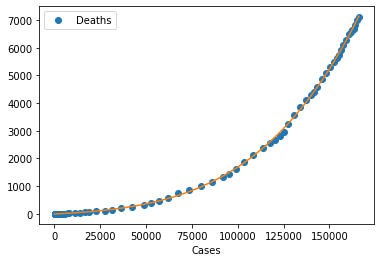

In [3]:
import numpy as np
coefs = np.polyfit(x=de['Cases'], y=de['Deaths'], deg=4)
de.plot(kind='line', x='Cases', y='Deaths', linestyle='', marker='o')
poly = np.poly1d(coefs, variable='Cases')
plt.plot(de['Cases'], poly(de['Cases']))
print("Deaths(Cases) = ")
print(poly)

In [4]:
overlapping_days = int(0.5 * min([len(de['Cases']), len(de['Deaths'])]))

lcor = lagged_correlation = pd.DataFrame.from_dict(
    {'Cases VS Deaths': [de['Cases'].corr(de['Deaths'].shift(-t)) for t in range(overlapping_days)],
     'Delta': [-t for t in range(overlapping_days)]}).set_index('Delta')

fig, ax = plt.subplots()
lcor.plot(ax=ax)

poly = np.poly1d(np.polyfit(x=lcor.index, y=lcor['Cases VS Deaths'], deg=7), variable='r')
ax.plot(lcor.index, poly(lcor.index), label="poly")

lag = [x.real for x in poly.deriv().r if x.imag==0 and x.real<0][0]
ax.axvline(lag, linestyle=':')
ax.legend()
display(lag)

-38.19284508265555